### Формирование сигнала на борту NOAA

Как вы можете помнить, длина строки в формате APT составляет 2080 пикселей (909 пикселей для каждого изображения). Одна строка APT состоит из одной строки для видео канала A, за которой следует одна строка для видео канала Б, где канал A - видимый, а Б - ИК. В процессе формирования сигналов APT система вставляет информацию о калибровке и телеметрии, что приводит к образованию изображения, показанного ниже.

<img src="https://noaa-apt.mbernardi.com.ar/examples/argentina.png" alt="" style="width: 600px;"/>

Рассмотрим, как формируется одна строка изображения в формате APT. 

Для видимой и инфракрасной части генерация сигналов идентична: в основе лежат 909 пикселей основного изображения, потом к ним добавляются данные телеметрии, а уже после добавляется синхроимпульс.

| | | Канал А | | | | | | Канал Б | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|| Синхроимпульс | Телеметрия | Данные | Телеметрия | | | Синхроимпульс | Телеметрия | Данные | Телеметрия ||

Синхроимпульс – это уникальная последовательность данных, которая не должна встречаться нигде в области данных и служит для определения начала каждой строки, то есть позволяет принимающему программному обеспечению выровнять получаемые данные. 

Кроме того, в получаемых данных есть минутные метки, которые представляют собой четыре строки, чередующиеся черными и белыми линиями, которые повторяются каждые 60 секунд (120 строк). Канал Б всегда является ИК-каналом, поэтому пробелы белые, а маркеры черные. Когда канал А является видимым, пробелы черные, а минутные маркеры белые.

<img src="https://github.com/tom2238/apt-encoder/raw/master/doc/apt_frame.png" alt="" style="width: 600px;"/>

Телеметрия — это блоки с информацией о переменных, которые необходимы для калибровки снимка и вычисления информации о температуре подстилающей поверхности Земли.

Изучив формат кадра, показанный на рисунке, можно увидеть, что оба канала A и B имеют серию из 16 блоков, называемых «клиньями», используемых при калибровке изображения APT. Каждый из таких клиньев состоит из 8 последовательных строк. Таким образом, раздел телеметрии состоит из шестнадцати клиньев по 8 повторяющихся строк каждый, которые используются в качестве эталонных значений для декодирования каналов изображения.

*Первые восемь клиньев начинаются с 1/8 максимальной интенсивности и последовательно увеличиваются на 1/8 до полной интенсивности в восьмом сегменте, причем девятый имеет нулевую интенсивность. Каждый из клиньев с десятого по пятнадцатый кодирует данные о калибровке датчика. Между каналами А и Б различаются только клинья 15 (значение "заднего сканирования", когда один из ИК-радиометров "смотрит" на излучатель черного тела) и 16 (идентификатор канала).*

Шестнадцать блоков телеметрии повторяются каждые 128 строк, и эти 128 строк называются кадром.

| Имя         | Длина          | Описание |
| :--         | :--            | :--      |
| Sync A      | 39             | Биты 000011001100110011001100110011000000000 |
| Space A     | 47             | |
| Image A     | 909            | Пиксели изображения: чем выше амплитуда - тем ярче пиксель |
| Telemetry A | 45             | |
| Sync B      | 39             | Биты 000011100111001110011100111001110011100 |
| Space B     | 47             | |
| Image B     | 909            | Пиксели изображения: чем выше амплитуда - тем ярче пиксель |
| Telemetry B | 45             | |
| **Total**   | **2080 / 0.5 сек** | |

<img src="https://github.com/tom2238/apt-encoder/raw/master/doc/apt_line_format.png" alt="" style="width: 600px;"/>

Особенностью спутниковой связи является необходимость работы в условиях сравнительно малого отношения сигнал/шум, вызванного значительной удалённостью приёмника от передатчика и ограниченной мощностью спутника. Для передачи цифровых данных по спутниковому каналу связи они должны быть сначала преобразованы в радиосигнал, занимающий определённый частотный диапазон. Для этого применяется модуляция.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Amfm3.gif" alt="" style="width: 400px;"/>

**Зачем нужна модуляция?** При передаче информации на малые расстояния часто используются низкочастотные колебания, передача которых на расстояние свыше нескольких метров крайне затруднительна, в силу их быстрого ослабевания. Но при необходимости передачи сигналов на бОльшие расстояния на помощь приходит модуляция.

**В чем суть модуляции?** Возьмем высокочастотное колебание. Само по себе оно не несет никакой информации. Его мы будем использовать в качестве основного компонента передаваемого сигнала. Частоту этого колебания называют несущей. Для того, чтобы начать передавать полезную информацию, нам нужно каким-нибудь образом видоизменить несущую частоту так, чтобы она повторяла закономерности сигнала, который мы хотим передать. Иными словами, нам нужно сделать так, чтобы она несла информацию о нашем полезном сигнале. Это самое видоизменение называется модуляцией. Модуляция осуществляется с помощью модулятора со стороны отправителя, а с помощью демодулятора на стороне получателя высокочастотный сигнал преобразуется обратно в низкочастотный. Они собраны в одно устройство под названием модем, которое получилось благодаря слиянию слов МОдулятор и ДЕМодулятор.

<img src="http://neerc.ifmo.ru/wiki/images/5/57/Analog_modulation.png" alt="" style="width: 500px;"/>

В системе, используемой NOAA-19, используется амплитудная и частотная модуляции. 

*Сначала данные модулируются по амплитуде с помощью поднесущей 2,4 кГц, что приводит к формированию аналогового сигнала с полосой пропускания 34 кГц. Сделано это для уменьшения влияния помех при генерации сигнала на борту спутника NOAA-19. Перед непосредственной передачей на землю сигнал дополнительно модулируется по частоте 136-138 МГц (в зависимости от спутника), чтобы на этой частоте сигнал не сильно затухал, проходя через толщу атмосферы..*

Частотная демодуляция производится приемником сигнала, так что разберемся с амплитудной.

Рассмотрим простой пример. Допустим, что мы используем любой из видов цифровой передачи информации, для обозначения логической единицы мы передаём сигнал, а для логического нуля молчим. 

Populating the interactive namespace from numpy and matplotlib


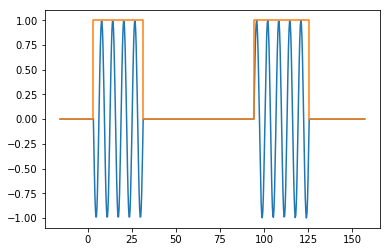

In [1]:
%pylab inline

x = np.array([-5 * pi])
x = np.append(x, np.linspace(pi, 10 * pi, 100))
x = np.append(x, np.linspace(30 * pi, 40 * pi, 100))
x = np.append(x, [50 * pi])

y = [-5 * pi, pi, pi, 10 * pi, 10 * pi, 30 * pi, 30 * pi, 40 * pi, 40 * pi, 50 * pi]

plot(x, np.sin(x))
plot(y, [0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

Важно отметить что синяя гармоническая частота может быть любая, но должна доходить до получателя сигнала без существенного затухания. 

Для демодуляции сигнала, который вы отобразили на прошлом занятии, можно использовать преобразование Гильберта.

**Практическая работа**

1. Выполните преобразование Гильберта для набора данных, полученного на прошлом занятии (в результате получите аналитический сигнал), используя функцию `hilbert` из пакета `scipy`.
2. Вычислите и отобразите огибающую амплитуды (amplitude envelope) получившегося аналитического сигнала.

Частота дискретизации: 11025


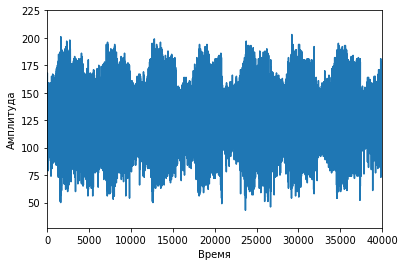

In [21]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

rate, data = wav.read('signal(1).wav')
print("Частота дискретизации:", rate)
audio = np.array(data)
audio1 = audio - np.ones(len(audio))*audio.mean()

plt.plot(data)
plt.xlim(left=0, right=40000)
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.show()

Text(0, 0.5, 'Amplitude')

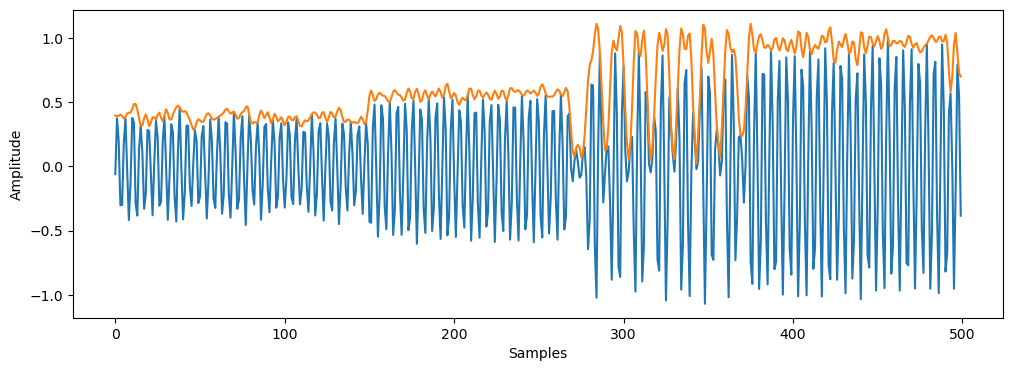

In [18]:
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import numpy as np
from scipy. io import wavfile as wav
f, signal = wav.read("signal (1).wav")
analytic_signal = hilbert (signal)
plt.figure(figsize=(12, 4))
analytic_signal = analytic_signal[3000000:3000500:1]
analytic_signal = analytic_signal - np.mean(analytic_signal)
analytic_signal = analytic_signal/np.max(analytic_signal)
plt.plot(analytic_signal)
amplitude_envelope = np.abs(analytic_signal)
plt.plot (amplitude_envelope)
plt.xlabel ("Samples")
plt.ylabel ("Amplitude")

Рассмотрим цифровую запись аналогового сигнала.

Чтобы записать непрерывный сигнал в цифровой формат, нужно сначала определить частоту записи, то есть количество значений в секунду. Это значение называется частотой дискретизации (частота взятия отсчётов непрерывного по времени сигнала при его дискретизации).

Теперь рассмотрим один период синусоиды. Какого минимального количества произвольных точек будет достаточно для однозначного определения её амплитуды и частоты?

Согласно [теореме Котельникова](https://ru.wikipedia.org/wiki/Теорема_Котельникова), нам нужно взять более двух точек на один период (чтобы однозначно восстановить исходный сигнал, частота дискретизации должна более чем в два раза превышать наибольшую частоту в спектре сигнала). Тогда, используя [дискретное преобразование Фурье](https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье), мы сможем выделить исходный сигнал. 

Погружаться в данные преобразования и теоремы мы не станем, так как наш сигнал заведомо можно расшифровать, и делать мы это будем, используя библиотеки Python. Подробнее с этими понятиями вы познакомитесь на старших курсах.

Вы уже знаете, что в нашем аудиофайле за одну секунду передаётся 11025 значений, и что на изображении в формате APT это 2 строки. Значит наш исходный сигнал нужно преобразовать в матрицу шириной 5512 (11025/2) элементов. И полученную матрицу преобразовать и изображение.

**Практическая работа**

1. Преобразуйте полученную в прошлом задании огибающую амплитуды в матрицу шириной 5512 элементов.
2. Получите и отобразите из получившейся матрицы изображение.

In [26]:
M = amplitude_envelope[:7099456].reshape(5512, 5512)
plt.imshow(M, cmap = "gray")

ValueError: cannot reshape array of size 500 into shape (5512,5512)